In [1]:
DATA_PATH_HD="../data/processed/IAM.PA.pkl"
DATA_PATH_IS="../data/processed/Income_Statement.pkl"
DATA_PATH_CF="../data/processed/Cash_Flow.pkl"
DATA_PATH_BS="../data/processed/Balance_Sheet.pkl"

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

C:\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df=pd.read_pickle(DATA_PATH_HD)

## INDICATORS 

In stock trading, the high and low refer to the maximum and minimum prices in a given time period. Open and close are the prices at which a stock began and ended trading in the same period. Volume is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

Valuable information can be gleaned from understanding the open, high, low, close of a stock, and as well as it’s trading volume.

In [4]:
fig = make_subplots(rows=3, cols=2)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Open']),row=1, col=1)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['High']),row=1, col=2)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Low']),row=2, col=1)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Close']),row=2, col=2)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Adj Close']),row=3, col=1)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Volume']),row=3, col=2)

# Update xaxis properties
for i in range(1,4):
    for j in range(1,3):
        fig.update_xaxes(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ]),bgcolor = "#222",
            )
        ,row=i, col=j)

# Update yaxis properties
fig.update_yaxes(title_text="Open", row=1, col=1)
fig.update_yaxes(title_text="High", row=1, col=2)
fig.update_yaxes(title_text="Low", row=2, col=1)
fig.update_yaxes(title_text="Close", row=2, col=2)
fig.update_yaxes(title_text="Adj Close", row=3, col=1)
fig.update_yaxes(title_text="Volume", row=3, col=2)


fig.update_layout(height=600, width=1000, title_text="Side By Side Subplots of indicators",template="plotly_dark")
fig.show()

In [5]:
fig = px.line(df, x="Date", y=df.drop(['Volume'], axis=1).columns)
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")

fig.update_layout(template="plotly_dark")
fig.show()

In [6]:
fig = px.line(df, x="Date", y=df.drop(['Volume','Adj Close'], axis=1).columns,
              title='Indicators Variation')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.update_layout(template="plotly_dark")
fig.show()

In [7]:
fig = px.line(df, x="Date", y=df.drop(['Volume','Adj Close','Low','High'], axis=1).columns,
              title='Open & close ')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.update_layout(template="plotly_dark")
fig.show()

In [8]:
fig = px.line(df, x="Date", y=df.drop(['Volume','Adj Close','Open','Close'], axis=1).columns,
              title='High & low Variation')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.update_layout(template="plotly_dark")
fig.show()

In [9]:
fig = px.scatter_matrix(df, dimensions=["Open", "Close", "High", "Low","Adj Close","Volume"])
fig.update_layout(height=650,template="plotly_dark")
fig.show()

## Candlestik

This type of chart is the most used by traders .

In [10]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_xaxes(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ]),bgcolor = "#222",
            ))
fig.update_layout(template="plotly_dark")
fig.show()

## Returns

In [11]:
df['Day_Perc_Change']= df['Adj Close'].pct_change()*100
df['Day_Perc_Change']

0           NaN
1      1.492546
2     -0.735298
3      0.740745
4     -1.470597
         ...   
255   -0.754717
256    0.000000
257   -0.760456
258    0.000000
259    0.000000
Name: Day_Perc_Change, Length: 260, dtype: float64

We delete the example with the NaN value

In [12]:
df.dropna(axis = 0, inplace = True)

In [13]:
fig = px.line(df, x="Date", y="Day_Perc_Change",
              title='Returns variation')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.update_layout(template="plotly_dark")
fig.show()

It can be observed that for most of the days, the returns are between -1% to 1% with few spikes in between crossing +40% (September 2021).

In [14]:
fig.add_trace(go.Scatter(x=df['Date'], y=df['Day_Perc_Change'],
                    mode='lines+markers',
                    name='Volume'))

fig.add_trace(go.Scatter(x=df['Date'], y=df['Volume']/1000,
                    mode='lines',
                    name='Day_Perc_Change'))
fig.show()

Daily volume of trade has been reduced in scale to match with the daily return scale)
By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders and investors. 

## Trending

We wish to see how the stock was trending in the past year. This can be visualized as a pie chart, with each sector representing the percentage of days each trend occurred. We’ll plot a pie chart for the ‘Trend’ column to visualize the relative frequency of each trend category.

In [15]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
1,2021-01-27,13.4,13.6,13.3,13.6,6.581137,8806,1.492546,Positive
2,2021-01-28,13.8,13.8,13.1,13.5,6.532746,6384,-0.735298,Slight Negative
3,2021-01-29,13.3,13.7,13.2,13.6,6.581137,6151,0.740745,Slight Positive
4,2021-02-01,13.6,13.8,13.3,13.4,6.484355,9474,-1.470597,Negative
5,2021-02-02,13.4,13.7,13.1,13.5,6.532746,7607,0.746273,Slight Positive


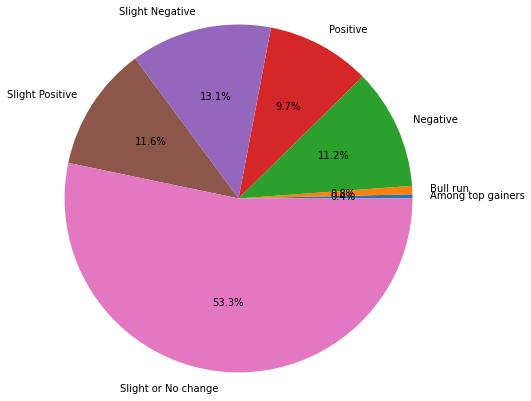

In [16]:
HD_pie_data = df.groupby('Trend')
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(HD_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

For the period under consideration , the IAM stock never was among the top gainers , and among the top losers for 0.4 % of the time . For about 10.9% of the time period, the stock has performed positively . Likewise, for most period of time (about 54.7%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

## Moving average

In [17]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name] = df['Adj Close'].rolling(window=ma,center=False).mean()

df.tail() 

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend,MA for 10 days,MA for 20 days,MA for 50 days
255,2022-01-20,13.25,13.25,12.95,13.15,13.15,915,-0.754717,Slight Negative,13.165,13.1900,13.324
256,2022-01-21,13.20,13.20,12.90,13.15,13.15,1374,0.000000,Slight or No change,13.165,13.1925,13.316
257,2022-01-24,13.05,13.25,12.80,13.05,13.05,4949,-0.760456,Slight Negative,13.140,13.1925,13.308
258,2022-01-25,13.25,13.25,13.05,13.05,13.05,1968,0.000000,Slight or No change,13.125,13.1900,13.301
259,2022-01-26,13.25,13.25,12.95,13.05,13.05,6805,0.000000,Slight or No change,13.110,13.1775,13.292


In [18]:
fig = px.line(df, x="Date", y=df.drop(['Volume','High','Low','Open','Close','Day_Perc_Change','Trend'], axis=1).columns,
              title='Moving average')
fig.update_xaxes(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ]),bgcolor = "#222",
            )
        )
fig.update_layout(width=800,template="plotly_dark")
fig.show()

In [19]:
raw_df1=pd.read_pickle(DATA_PATH_BS)
raw_df2=pd.read_pickle(DATA_PATH_CF)
raw_df3=pd.read_pickle(DATA_PATH_IS)

In [20]:
raw_df1

,date,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Capital Lease Obligations,Net Tangible Assets,Working Capital,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordinary Shares Number,Treasury Shares Number
0,2020-12-30,64851000.0,48162000.0,16689000.0,16274000.0,12721000.0,1639000.0,-4714000.0,-28173000.0,31442000.0,-4714000.0,20360000.0,16031000.0,879095.0,879039.0,56.187
1,2019-12-30,64851000.0,48848000.0,16003000.0,15004000.0,12069000.0,1652000.0,-5941000.0,-30543000.0,29343000.0,-5941000.0,18926000.0,15791000.0,879095.0,878852.0,243.077
2,2018-12-30,62131000.0,42641000.0,19490000.0,19143000.0,15668000.0,1645500.0,-561000.0,-24378000.0,31272000.0,-561000.0,15604000.0,13904000.0,879095.0,878852.0,243.077


## Liquidity ratios

Liquidity ratios measure a company’s ability to meet its short-term obligations. The current ratio measures the current assets available to cover one unit of current liabilities. A higher ratio indicates a higher level of liquidity; there is a greater availability of short-term resources to cover short-term obligations. If the current ratio is greater than 1, current assets are greater than current liabilities and the company appears to
be able to cover its debts in the short term. But not every current asset is easily or quickly convertible into cash, so a current ratio of 2 is frequently used as a minimum desirable standard. Another liquidity ratio, the quick ratio, excludes inventories, which are the least liquid current asset. This ratio is a better indicator than the current ratio of what would happen if the company had to settle with all its creditors at short notice.
A quick ratio of 1 or higher is often viewed as desirable. However, a high current orquick ratio is not necessarily indicative of a problem-free company. It may also indicate that the company is holding too much cash and not investing in other resourcesnecessary to create more profit.

# Curent ratio

In [21]:
current_ratio = raw_df1["Total Assets"][0] / raw_df1["Total Liabilities Net Minority Interest"][0]
current_ratio

1.3465180017441136

# Quick ratio

In [22]:
quick_ratio = (raw_df1["Total Assets"][0]- raw_df1["Invested Capital"][0]) / raw_df1["Total Liabilities Net Minority Interest"][0]
quick_ratio

0.6936796644657613

IAM’s current ratio of less than 2 and its quick ratio of less than 1 indicate that the company may have difficulties meeting its obligations in the short term.

## Debt-to-equity ratio

In [23]:
debt_to_equity_ratio =raw_df1["Total Debt"][0] / raw_df1["Total Equity Gross Minority Interest"][0]
debt_to_equity_ratio

1.2199652465695967

A debt-to-equity ratio close to 1 indicates that debt and equity provide approximately equal amounts of financing to IAM.

## Equity multiplier ratio

In [24]:
equity_multiplier_ratio=raw_df1["Total Assets"][0] /raw_df1["Total Equity Gross Minority Interest"][0]
equity_multiplier_ratio

3.8858529570375695

This equity multiplier measures the amount of total assets supported by one monetary unit of equity. The greater the value of the assets relative to equity, the more debt is being used as financing. A company with a low financial leverage or equity multiplier is one predominantly financed by equity.